# Statistics 

Considering the amount of data produced nowadays in many fields, the computer manipulation of this information is not only important but also has become a very active field of study. Despite of the fact of increasing computational facilities, the effort necessary to make statistical analysis has become more complicated, at least in the computational aspect. This is why 
becomes fundamental to some aspects, leastwise in a raw way.  

- - -
- [Data Adjust](#Data Adjust) 
    - [Linear least square](## Linear least squares)
    - [Example 1](# Example 1)
    - [Non-linear least square](##Non-linear least square)
- [Random Numbers](#Random Numbers )  
    - [Example 2](#Example 2)
- - -

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import animation


Populating the interactive namespace from numpy and matplotlib


#Data Adjust

Given a data set, the first approach to find a function that passes through the points would be using a
interpolation polynomial. But we should take special attention to the way data set is gathered, i.e., usually
is a sample obtained experimentally or in a way that has associated an intrinsic error. 
Then, forcing that the approximate function passes through all the points would actually incur in incrementing the error. This is why it is necessary to build a different procedure to build the function that fits the data.

The fitting functions, though, are build using a lagrange polynomial and the order of this polynomial constitutes
the approximation that is going to be used. But the fitting function is not going to take the exact value in
the known points, they are going to desagree in certain tolerance value. 


This type of procedure is also used to approximate functions to a simper type of function. Although the procedure
is very similar is not going to be include because of the lack of use of it that commonly has.  


## Linear least squares

Approximating a data set to a linear langrange polynomial would be 

$$
y_i= f(x_i) = a_1x_i + a_0
$$


the problem is that the values $y_i$ are not precise, then it is proposed to find the best approximating

line despite of the fact it does not coincide with the data at any point. The best linear approximation in 

the absolute sense requieres that the values of $a_0$ and $a_1$ would be found to minimize 

$$
E(a_0,a_1) = \sum_{i=1}^{N}| y_i - (a_1x_i + a_0)|
$$


To minimize the function of 2 variables it is necessary to set its partial derivatives to zero and simultaneously 

solve to the resulting equations. But the best procedure for determining best linear approximations is to minimize 

the sum of the square of the diffences between the y values on the approximating line and the given y values.

This is, minimize the next expression with respect to $a_0$ and $a_1$

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$


i.e., a minimun to occur. Then, it is needed to take the partial derivatives with respect to $a_0$  and $a_1$ and

equating them to zero.


$$
\frac{\partial E}{\partial a_0} = 0 \hspace{1cm} 
\frac{\partial E}{\partial a_1} = 0 
$$

Afterwards, 

$$
0= 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-1) \hspace{1.5cm} 
0 = 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-x_i) \\
a_0 m + a_1\sum_{i=1}^{m}x_i = \sum_{i=1}^{m} y_i \hspace{1.5cm} a_0\sum_{i=1}^{m}x_i  + a_1\sum_{i=1}^{m}x_i^2 = \sum_{i=1}^{m} x_iy_i 
$$

where the coefficients $a_0$ and $a_1$ can be easily obtained

$$
a_0 = \frac{\sum_{i=1}^{m} x_i^2\sum_{i=1}^{m}y_i - \sum_{i=1}^{m} x_iy_i \sum_{i=1}^{m} x_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} \hspace{1.5cm}
a_1 = \frac{m\sum_{i=1}^{m} x_iy_i^2 - \sum_{i=1}^{m} x_i \sum_{i=1}^{m} y_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} 
$$

Now, using the error definition one can find the error associated to the approximation made,

since the coefficients $a_0$ and $a_1$ are already known. 

## Example 1

A body is moving under the influence of an external force, the variation of the position measured for different 
times are compiled in table 1 

| t(s) | x(m) | v(m/s)         
| :------: |:-------------: | :-------:|
|0| 2.76 | 33.10
| 1.11| 29.66 | 21.33
| 2.22|46.83 | 16.57
|3.33 | 44.08 |-5.04
| 4.44| 37.26| -11.74
| 5.55| 12.03| -27.32| 


In [2]:
# Finding adjusting parameters 
def Linear_least_square( x,y ):
    
    #Finding coefficients 
    length = len(x)
    square_x = np.sum([x[i]**2 for i in xrange(length)])
    sum_xy = np.sum([x[i]*y[i] for i in xrange(length)])
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    a0 = ( square_x*sum_y - sum_xy*sum_x ) / ( length*square_x  - sum_x**2 )
    a1 = ( length*sum_xy - sum_x*sum_y ) / ( length*square_x  - sum_x**2 )
    
    #Returning a_0 and a_1 coefficients
    return np.array([a0,a1])

#Line function adjusting the data set
def Line(a0,a1,x):
    return a0+a1*x


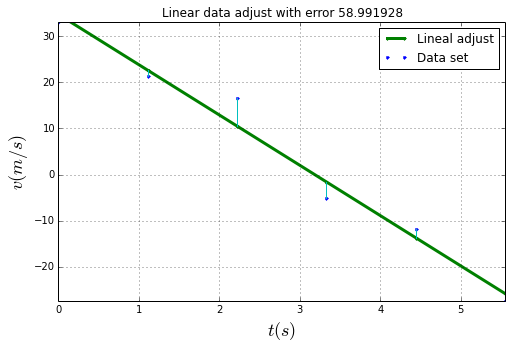

In [3]:
#========================================================
# Adjusting to a first order polynomy the data set v 
#========================================================
#Setting figure
plt.figure( figsize = (8,5) )

#Time
t = np.array([ 0.,  1.11,  2.22,  3.33,  4.44, 5.55])

#Velocities measured for every time t[i]
v = np.array([33.10, 21.33, 16.57, -5.04, -11.74, -27.32])

#Making data adjust
a0, a1 = Linear_least_square( t,v )

#Finding error associated to linear approximation
E = np.sum([ ( v[i] - Line(a0,a1,t[i]) )**2  for i in xrange(len(t))])

#Plotting solution
plt.plot( t, Line(a0,a1,t), ".-", lw = 3.,color = "green",label="Lineal adjust" )
plt.plot( t, v, ".",color = "blue", label = "Data set" )
for i in xrange(len(t)):
    plt.plot(np.array([t[i],t[i]]), np.array([v[i],Line(a0,a1,t[i])]),"c-")
    
#Format of figure
plt.xlabel( "$t(s)$", fontsize = 18 )
plt.ylabel( "$v(m/s)$", fontsize = 18 )
plt.xlim( (t[0], t[-1]) )
plt.ylim( (v[-1], v[0]) )
plt.title("Linear data adjust with error %f"%E)
plt.legend()
plt.grid(1)

## <font color='red'>     **Activity** </font>

<font color='red'>    
Using the next data set of a spring mass system, find the lineal adjust. 
</font>

<img src="./figures/datos.png">

##Non-linear least square

In general, it can be used any polynomial order to adjust a data set, since it is satisfied that $n<m-1$,
with n the order of the polynomial and m the number of points known. Then, we have
$$
P_n(x) = a_nx^n + a_{n-1}x^{n-1}+...+a_1x+a_0
$$

Using a similar procedure followed in linear least square approximation, it is chose the constants $a_0,...a_n$ to minimize
the least square error 

$$
E = \sum_{i=1}^{m} ( y_i - P_n(x_i) )^2
= \sum_{i=1}^{m} ( y_i - \sum_{j=0}^{n}a_jx_i^j )^2
$$

Expanding the square difference and taking into account that E to be minimized requires that $\partial E/ 
\partial a_j = 0 $ for each $j=0,1,...n$. Following these arguments, it is found that the n+1 equations needed
to solve to find the coefficients $a_j$ are

$$
\sum_{k=0}^{n} a_k \sum_{i=1}^{m}x_i^{j+k} = \sum_{i=1}^{m}y_ix_i^j
$$

for each $j=0,1,...n$. A better way to show the equations, where m is the data length and n is the polynomial
order, is 

$$
a_0\sum_{i=1}^{m}x_i^0 + a_1\sum_{i=1}^{m}x_i^1 + a_2\sum_{i=1}^{m}x_i^2 + ... +  a_n\sum_{i=1}^{m}x_i^n =  \sum_{i=1}^{m}y_i x_i^0 \\
a_0\sum_{i=1}^{m}x_i^1 + a_1\sum_{i=1}^{m}x_i^2 + a_2\sum_{i=1}^{m}x_i^3 + ... +  a_n\sum_{i=1}^{m}x_i^{n+1} =  \sum_{i=1}^{m}y_i x_i^1\\ 
\dotsc \\
a_0\sum_{i=1}^{m}x_i^n + a_1\sum_{i=1}^{m}x_i^{n+1} + a_2\sum_{i=1}^{m}x_i^{n+2} + ... +  a_n\sum_{i=1}^{m}x_i^{2n} =  \sum_{i=1}^{m}y_i x_i^n
$$

Again, the error associated to the approximation can be obtained by initial definition of E. The error can also be defined 
using a weight function $W_i$ as

$$
E = \sum_{i=1}^{m} W_i( y_i - P_n(x_i) )^2
$$

this function $W_i$ can be defined in several ways. If $W_i = \sigma_i$, i.e., the standard deviation per particle, it is necessary to know the probability distribution followed by the experiments. In these cases where it is not known,
it is usually taken as one. 

## <font color='red'>     **Activity** </font>

<font color='red'> 
Adjust the position column data in the table 1 to a second order polynomial. What is the acceleration suffered
by the body?
</font>


## <font color='red'>     **Activity** </font>


<font color='red'> 
The air drag for a sphere that is moving at high speeds can be expresed in the following form 
$$
f_{drag} = -\frac{1}{2} C \rho A v^2
$$

where C is the drag coefficient(0.5 for a sphere), $\rho$ is the air density (1.29kg/$m^3$) 
and A is the cross-sectional area. 
Generate points that have a bias of the value obtanied with
$f_{drag}$ using np.random.random. 


Afterwards, use a second order polynomial to fit the data 
generated and find the error associated to the approximation. 
</font>

# Random Numbers 

In nature it is not uncommon finding phenomena that are random intrinsic, this is why it becomes a necessity to produce random numbers in order to model such events. But, let us think about the operations that a computer can do, they are done following certain stablished rules, how then can be generated random numbers?  

This is achieved until certain point, it is only possible produce pseudo numbers, i.e, numbers obtained following some basic rules. At sequence of numbers apparently random but that are going to repeat after some period. 

Now, the most basic way to understand the generation of a pseudo-random number consists in following the next recurrence rule that produces integer random numbers

$$
r_{i+1} = (ar_i+b)\%N 
$$

$r_i$ is the seed, $a$ and $b$ and $N$ are coefficients chose. Notice that $\%$ represents the module, then the numbers obtained are going to be smaller than N. 

Now, consider the case when $ a= 3 $, $b = 2$ and $N = 5$ and the initial seed $r_0 = 3$. The new seed is the number obtained
in the last step. 

In [4]:
# Randon number function 
def random_number(seed):
    return (a*seed + b)%N

#Constant values 
a = 4
b = 1
N = 9
#Amount of random numbers  
N_iter = 15
rnumber = np.zeros(N_iter+1)
#Initial seed
rnumber[0] = 49

for i in xrange(N_iter): 
    rnumber[i+1] = random_number( rnumber[i])

print "Random numbers produced using a = %d, b = %d and N = %d\n" % ( a,b,N )  
print rnumber[1:]    

Random numbers produced using a = 4, b = 1 and N = 9

[ 8.  6.  7.  2.  0.  1.  5.  3.  4.  8.  6.  7.  2.  0.  1.]


Notice that after N random numbers produced the apparently random sequence starts repeating again, i.e., N is the period of the sequence. Then, it is necessary to take N as big as possible but without incuring in an overflow.  What happens when the initial seed is changed?  

<img src="./figures/random1.png">

To generate random numbers can be used numpy library, specifically the set functions random. There is also another library
used random, but it contains few functions comparing with numpy. 
To generate a random number between 0 and 1 initiallizing the seed with the actual time.



In [5]:
np.random.seed()
np.random.random()

0.6935313352397631

To generate a number between  and a number A

In [6]:
A = 100. 
A*np.random.random()

43.75232924187592

To generate a random number between a range -B to B 

In [7]:
B = 15
B - 2*B*np.random.random()

-12.581424504749194

#Example 2

###Random walk

Start at the origin and take a 2D random walk. It is chosen values for $\Delta x'$ and $\Delta y'$ in the range [-1,1].
They are normalized so each step is of unit length. 

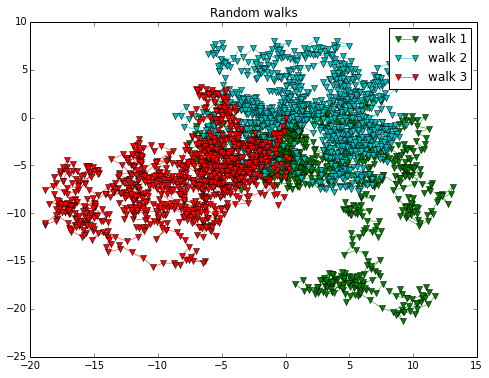

In [9]:
#Initial positions
x0 = 0.
y0 = 0.
pos = [x0,y0]
#Number of random steps
N_steps = 1000
#Number of random walks
N_walks = 3


def Random_walk( pos, N ):
    
    #Initializing the seed
    np.random.seed()
    
    x = np.zeros( N )    
    y = np.zeros( N )    

    #Initial conditions
    x[0] = pos[0]
    y[0] = pos[1]
    
    #Generating random positions
    for i in xrange(1,N_steps):
        x[i] = ( np.random.random(  ) - 0.5 )*2 + x[i-1]
        y[i] = ( np.random.random(  ) - 0.5 )*2 + y[i-1]
    
    return x, y
    

colors = ('b', 'g', 'c', 'r', 'm', 'y', 'k')
axisNum = 0
plt.figure( figsize = (8,6) )

#Plotting random walks
for j,c in zip( range(N_walks),colors):
    
    axisNum += 1
    x,y= Random_walk( pos, N_steps )   
    color = colors[axisNum % len(colors)]  
    plt.plot(x,y,"v-", color = color, lw= 0.5, label = "walk %d"%(j+1))
    

plt.title("Random walks")
plt.legend()

## <font color='red'>     **Activity** </font>

<font color='red'> 
Radioactive decay: Spontaneous decay is a natural process in which a particle, with no external stimulation, decays into other
particles. Then, the total amount of particles in a sample decreases with time, so will the number of decays. 
The probability decay is constant per particle and is given by  

$$
P = -\lambda  
$$

Determin when radioactive decay looks like exponential decay and when it looks stochastic depending on the initial number of particles $N(t)$ .For this, suposse that the decay rate is 0.3$\times 10^6 s^{-1}$ . Make a logarithmic plot to show the results. 
</font>